## Project 3 Final Deliverable

#### By Sander Miller and Caroline Rausch

### Question:
As an aircraft flies through the air, crosswinds exert a force on the side of the plane that will push the plane sideways. In order to prevent the aircraft slowly drifting off course, pilots must adjust the heading of the aircraft so that the thrust force of the aircraft will cancel out the force of the wind on the aircraft. In our model, we address the question "At what angle do pilots of a Boeing 747-400 have to adjust their heading to depending on wind speed and direction?"

In [18]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import numpy as np

In [19]:
radian = UNITS.radian;
m = UNITS.meter;
s = UNITS.second;
kg = UNITS.kilogram;
N = UNITS.newton;

### Methodology 
We based our parameters off of assumptions we made about the Boeing 747-400. The average thrust force of a Boeing 747-400 is 1,008,000 N, the average velocity is 223 m/s, and the approximate area that the wind will hit on the plane is 747.56 square meters. The drag coefficient of a Boeing 747-400 is 2.1. The average air density at the height a Boeing 747-400 normally flies at is .8194 kg per cubic meter. 

In [20]:
params = Params(thrust_force=1008000, 
                air_density=.8194, 
                plane_area=747.56, 
                drag_coefficient=2.1,
                velocity=223) 

,values
thrust_force,1.008000e+06
air_density,8.194000e-01
plane_area,7.475600e+02
drag_coefficient,2.100000e+00
velocity,2.230000e+02


We swept the wind velocity from 2 to 30 m/s, which is the equivalent of about 5 to 70 mph. Within each wind velocity we swept the wind angle from 0 to 90 degrees. We then calculated the angle that the pilot would have to adjust the heading to in order to counteract the force of the wind on the plane. We did this by first setting x components of the drag and wind forces equal to the x component of the thrust force. Then by substituting in thrust force, wind speed, wind direction, air density, plane velocity, and plane area we solved for plane angle using the quadratic formula. The function returns a list of the wind angles tested and the resulting headings that the pilot would have to adjust the plane to under those wind conditions. 

In [21]:
def event_func(params):
    wind_angle_list=[]
    plane_angle_list=[]
    x = 1
    for i in linrange(2,34,4):
        wind_speed=i 
        for j in linrange(0,91,1):
            wind_angle=j*np.pi/180
            
            a = -1

            b = params.thrust_force-(2*params.velocity)

            c = -1*(((wind_speed * np.sin(wind_angle))**2*.5*params.air_density*params.plane_area)+params.velocity**2)
                
            x = (-b + sqrt(b**2 - 4*a*c))/(2*a) 
                
            plane_angle = np.arcsin(x)*(180/np.pi)-2.5
            
            wind_angle = j
               
            wind_angle_list.append(wind_angle)
            plane_angle_list.append(plane_angle)
            
    return wind_angle_list, plane_angle_list

In order to plot each wind velocity as a separate line on our plot, we separated the plane angle and wind angle lists by wind velocity. Next time we would create and plot these lists in a for loop.

In [22]:
wind_angle_list, plane_angle_list=event_func(params)

In [23]:
wind_angle_list2 = []
plane_angle_list2 = []
wind_angle_list6 = []
plane_angle_list6 = []
wind_angle_list10 = []
plane_angle_list10 = []
wind_angle_list14 = []
plane_angle_list14 = []
wind_angle_list18 = []
plane_angle_list18 = []
wind_angle_list22 = []
plane_angle_list22 = []
wind_angle_list26 = []
plane_angle_list26 = []
wind_angle_list30 = []
plane_angle_list30 = []

for i in range(0,91):
    wind_angle_list2.append(wind_angle_list[i])
    plane_angle_list2.append(plane_angle_list[i])
    wind_angle_list6.append(wind_angle_list[i+91])
    plane_angle_list6.append(plane_angle_list[i+91])
    wind_angle_list10.append(wind_angle_list[i+182])
    plane_angle_list10.append(plane_angle_list[i+182])
    wind_angle_list14.append(wind_angle_list[i+273])
    plane_angle_list14.append(plane_angle_list[i+273])
    wind_angle_list18.append(wind_angle_list[i+364])
    plane_angle_list18.append(plane_angle_list[i+364])
    wind_angle_list22.append(wind_angle_list[i+455])
    plane_angle_list22.append(plane_angle_list[i+455])
    wind_angle_list26.append(wind_angle_list[i+546])
    plane_angle_list26.append(plane_angle_list[i+546])
    wind_angle_list30.append(wind_angle_list[i+637])
    plane_angle_list30.append(plane_angle_list[i+637])

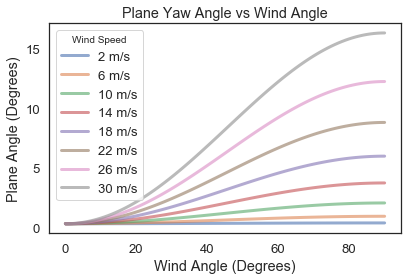

In [24]:
plot(wind_angle_list2,plane_angle_list2, label = '2 m/s')
plot(wind_angle_list6,plane_angle_list6, label = '6 m/s')
plot(wind_angle_list10,plane_angle_list10, label = '10 m/s')
plot(wind_angle_list14,plane_angle_list14, label = '14 m/s')
plot(wind_angle_list18,plane_angle_list18, label = '18 m/s')
plot(wind_angle_list22,plane_angle_list22, label = '22 m/s')
plot(wind_angle_list26,plane_angle_list26, label = '26 m/s')
plot(wind_angle_list30,plane_angle_list30, label = '30 m/s')

decorate(Title = 'Plane Yaw Angle vs Wind Angle',
         xlabel = 'Wind Angle (Degrees)',
         ylabel = 'Plane Angle (Degrees)')
legend(title ='Wind Speed')

### Results 
Above you can see the plot that shows the heading of the plane as a function of wind angle for each wind velocity. In the legend you can see the velocity of the wind for each line, and on the plot you can see that as the wind angle increases the heading adjustment increases, meaning that the pilot will have to fly the plane more into the wind as the wind approaches 90 degrees to the plane. In addition, as wind velocity increases the heading adjustment also increases since the wind force increases with wind speed. 


### Interpretation
You can see that each line reaches what appears to be a maximum when the wind angle is equal to 90 degrees. This makes sense because the x component of the wind force is greatest when the wind is perpendicular to the plane's intended path. Also when wind angle equals 0 degrees all the graphs seem to have a plane angle of 0 degrees because at that point the wind would be coming from directly behind the plane. These two things suggest that our results are plausible, however they do not account for the assumptions we made. We assumed that the thrust and velocity of the plane were both constant. We also assumed while accounting for drag that the surace area of the plane is constant at all plane angles which is not true. Finally we used average cruising height of a Boeing 747-400 and the associated air pressure at that height. Overall though I do believe our model is fairly accurate, and follows the pattern we predicted it would.